<a href="https://colab.research.google.com/github/styopochkin23/data-analytics-portfolio/blob/main/python_data_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Connecting Google Drive (IF NEEDED)
from google.colab import drive
drive.mount("/content/drive")



# Завантаження датасетів
events = pd.read_csv("/content/drive/MyDrive/projects/Final Project/events.csv")
products = pd.read_csv("/content/drive/MyDrive/projects/Final Project/products.csv")
countries = pd.read_csv("/content/drive/MyDrive/projects/Final Project/countries.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
events.head()


,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [4]:
products.head()


,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In [5]:
countries.head()


,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [6]:
events.shape
products.shape
countries.shape


(249, 5)

In [7]:
events.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


In [8]:
products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


In [9]:
countries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [10]:
events.isna().sum()


,0
Order ID,0
Order Date,0
Ship Date,0
Order Priority,0
Country Code,82
Product ID,0
Sales Channel,0
Units Sold,2
Unit Price,0
Unit Cost,0


In [11]:
products.isna().sum()


,0
id,0
item_type,0


In [12]:
countries.isna().sum()


,0
name,0
alpha-2,1
alpha-3,0
region,1
sub-region,1


In [13]:
events.describe()


,Order ID,Product ID,Units Sold,Unit Price,Unit Cost
count,1.330000e+03,1330.000000,1328.000000,1330.000000,1330.000000
mean,5.412048e+08,5788.096241,4952.201807,264.893541,187.246812
std,2.573882e+08,2820.728878,2905.198996,217.323460,176.158873
min,1.006406e+08,1270.000000,2.000000,9.330000,6.920000
25%,3.190004e+08,3127.000000,2356.750000,81.730000,35.840000
50%,5.387164e+08,5988.000000,4962.000000,154.060000,97.440000
75%,7.544628e+08,8681.000000,7459.500000,437.200000,263.330000
max,9.998797e+08,8969.000000,9999.000000,668.270000,524.960000


In [14]:
products.describe()


,id
count,12.000000
mean,5802.166667
std,2937.985452
min,1270.000000
25%,2959.000000
50%,6659.500000
75%,8390.000000
max,8969.000000


In [15]:
countries.describe(include="object")


,name,alpha-2,alpha-3,region,sub-region
count,249,248,249,248,248
unique,249,248,249,5,17
top,Afghanistan,AF,AFG,Africa,Sub-Saharan Africa
freq,1,1,1,60,53


In [16]:
# Видаляємо рядки з пропусками у критичних колонках
events_clean = events.dropna(subset=["Country Code", "Units Sold"])

# Перевіримо, скільки рядків залишилось
events_clean.shape


(1246, 10)

In [17]:
events_clean["Order Date"] = pd.to_datetime(events_clean["Order Date"])
events_clean["Ship Date"] = pd.to_datetime(events_clean["Ship Date"])


/tmp/ipython-input-475738624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_clean["Order Date"] = pd.to_datetime(events_clean["Order Date"])
/tmp/ipython-input-475738624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_clean["Ship Date"] = pd.to_datetime(events_clean["Ship Date"])


In [18]:
events_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1246 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1246 non-null   int64         
 1   Order Date      1246 non-null   datetime64[ns]
 2   Ship Date       1246 non-null   datetime64[ns]
 3   Order Priority  1246 non-null   object        
 4   Country Code    1246 non-null   object        
 5   Product ID      1246 non-null   int64         
 6   Sales Channel   1246 non-null   object        
 7   Units Sold      1246 non-null   float64       
 8   Unit Price      1246 non-null   float64       
 9   Unit Cost       1246 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 107.1+ KB


In [19]:
events_clean.duplicated().sum()
countries.duplicated().sum()
products.duplicated().sum()

np.int64(0)

In [20]:
events_clean[events_clean["Units Sold"] <= 0]


,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost


In [21]:
events_clean[events_clean["Unit Price"] <= 0]


,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost


In [22]:
events_clean[events_clean["Unit Cost"] <= 0]


,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost


In [23]:
# Дохід
events_clean["revenue"] = events_clean["Units Sold"] * events_clean["Unit Price"]

# Витрати
events_clean["cost"] = events_clean["Units Sold"] * events_clean["Unit Cost"]

# Прибуток
events_clean["profit"] = events_clean["revenue"] - events_clean["cost"]


/tmp/ipython-input-714560261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_clean["revenue"] = events_clean["Units Sold"] * events_clean["Unit Price"]
/tmp/ipython-input-714560261.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_clean["cost"] = events_clean["Units Sold"] * events_clean["Unit Cost"]
/tmp/ipython-input-714560261.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [24]:
events_clean[["revenue", "cost", "profit"]].head()


,revenue,cost,profit
0,133705.00,76121.50,57583.50
1,409960.10,233400.23,176559.87
3,127966.88,41968.64,85998.24
4,362897.60,243129.92,119767.68
5,1445686.20,1165411.20,280275.00


In [25]:
events_clean = events_clean.copy()


In [26]:
df = events_clean.merge(
    products,
    left_on="Product ID",
    right_on="id",
    how="left"
)


In [27]:
df = df.merge(
    countries,
    left_on="Country Code",
    right_on="alpha-3",
    how="left"
)


In [28]:
df = df.drop(columns=["id", "alpha-2", "alpha-3"])


In [29]:
df.shape
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1246 non-null   int64         
 1   Order Date      1246 non-null   datetime64[ns]
 2   Ship Date       1246 non-null   datetime64[ns]
 3   Order Priority  1246 non-null   object        
 4   Country Code    1246 non-null   object        
 5   Product ID      1246 non-null   int64         
 6   Sales Channel   1246 non-null   object        
 7   Units Sold      1246 non-null   float64       
 8   Unit Price      1246 non-null   float64       
 9   Unit Cost       1246 non-null   float64       
 10  revenue         1246 non-null   float64       
 11  cost            1246 non-null   float64       
 12  profit          1246 non-null   float64       
 13  item_type       1246 non-null   object        
 14  name            1246 non-null   object        
 15  regi

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,revenue,cost,profit,item_type,name,region,sub-region
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,133705.00,76121.50,57583.50,Cereal,Norway,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,409960.10,233400.23,176559.87,Cereal,Serbia,Europe,Southern Europe
2,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,127966.88,41968.64,85998.24,Clothes,Montenegro,Europe,Southern Europe
3,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,362897.60,243129.92,119767.68,Beverages,Serbia,Europe,Southern Europe
4,103450715,2015-03-15,2015-04-18,H,SVK,8681,Online,2220.0,651.21,524.96,1445686.20,1165411.20,280275.00,Office Supplies,Slovakia,Europe,Eastern Europe


In [30]:
total_orders = df["Order ID"].nunique()
total_units = df["Units Sold"].sum()
total_revenue = df["revenue"].sum()
total_profit = df["profit"].sum()
total_countries = df["name"].nunique()
total_categories = df["item_type"].nunique()

total_orders, total_units, total_revenue, total_profit, total_countries, total_categories


(1246,
 np.float64(6171671.0),
 np.float64(1598983761.26),
 np.float64(473709035.06),
 45,
 12)

In [31]:
category_units = df.groupby("item_type")["Units Sold"].sum().sort_values(ascending=False)
category_units


,Units Sold
item_type,
Office Supplies,581481.0
Clothes,579313.0
Beverages,577991.0
Vegetables,532510.0
Fruits,531135.0
Personal Care,530360.0
Baby Food,524265.0
Cosmetics,506188.0
Meat,477233.0


In [32]:
category_finance = df.groupby("item_type")[["revenue", "profit"]].sum().sort_values(by="profit", ascending=False)
category_finance


,revenue,profit
item_type,,
Cosmetics,2.213054e+08,88010907.56
Office Supplies,3.786662e+08,73411976.25
Household,2.788744e+08,69160454.84
Baby Food,1.338344e+08,50256042.90
Clothes,6.330732e+07,42544746.72
Cereal,9.467672e+07,40774964.94
Vegetables,8.203849e+07,33617356.30
Meat,2.013398e+08,27297727.60
Snacks,6.921349e+07,25012661.94


<Axes: title={'center': 'Profit by Product Category'}, xlabel='item_type'>

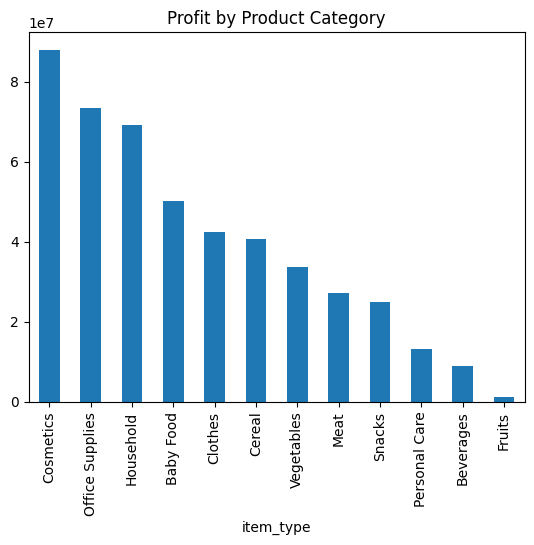

In [33]:
category_finance["profit"].plot(kind="bar", title="Profit by Product Category")


In [34]:
country_profit = df.groupby("name")["profit"].sum().sort_values(ascending=False).head(10)
country_profit


,profit
name,
Andorra,15410036.63
Ukraine,14804925.74
Malta,14610127.88
San Marino,13792992.81
Hungary,13786231.03
Macedonia,13684099.95
Czech Republic,13635593.78
Russia,13267682.64
Bosnia and Herzegovina,13257602.77


<Axes: title={'center': 'Top 10 Countries by Profit'}, xlabel='name'>

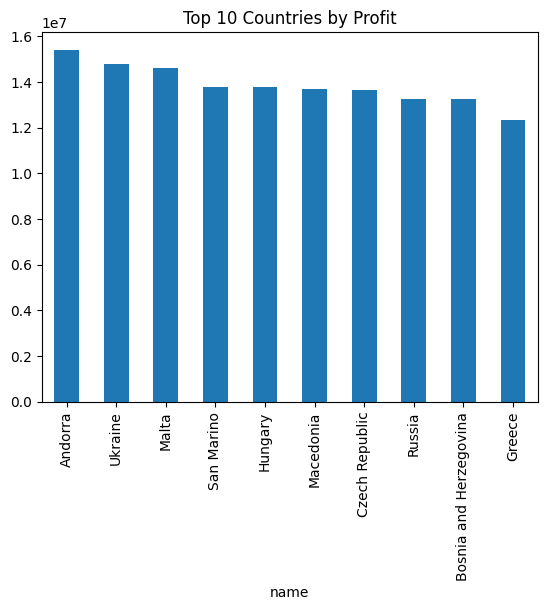

In [35]:
country_profit.plot(kind="bar", title="Top 10 Countries by Profit")


In [36]:
region_profit = df.groupby("region")["profit"].sum().sort_values(ascending=False)
region_profit


,profit
region,
Europe,4.485568e+08
Asia,2.515225e+07


<Axes: title={'center': 'Profit by Region'}, xlabel='region'>

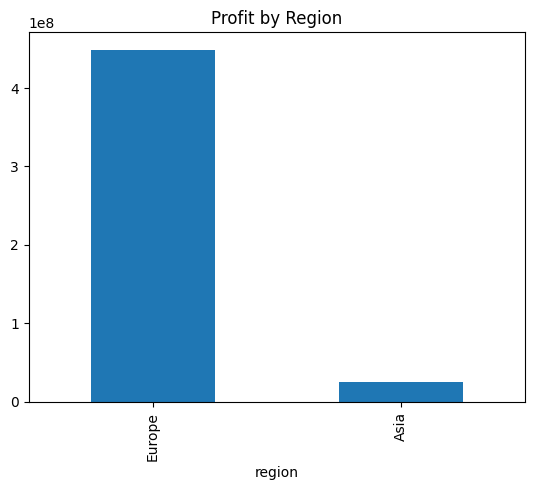

In [37]:
region_profit.plot(kind="bar", title="Profit by Region")



In [38]:
df["Sales Channel"] = df["Sales Channel"].str.strip().str.lower()


In [39]:
channel_profit = df.groupby("Sales Channel")["profit"].sum()
channel_revenue = df.groupby("Sales Channel")["revenue"].sum()

channel_profit, channel_revenue


(Sales Channel
 offline    2.385113e+08
 online     2.351977e+08
 Name: profit, dtype: float64,
 Sales Channel
 offline    8.100305e+08
 online     7.889533e+08
 Name: revenue, dtype: float64)

<Axes: title={'center': 'Profit by Sales Channel'}, xlabel='Sales Channel'>

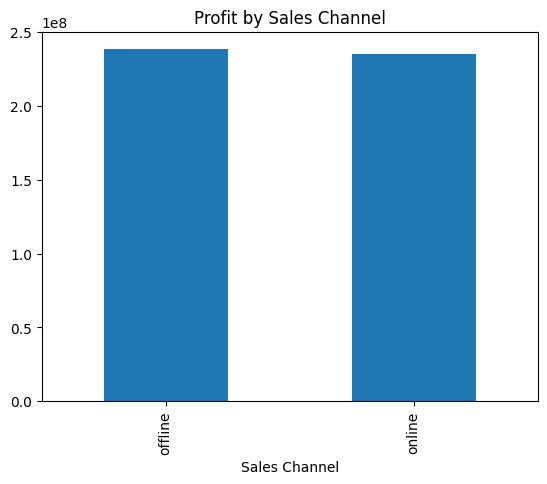

In [40]:
channel_profit.plot(kind="bar", title="Profit by Sales Channel")


Було проведено аналіз продажів компанії у розрізі товарних категорій, країн та каналів продажу. Визначено найбільш прибуткові категорії товарів та країни, що приносять найбільший дохід компанії. Також було проаналізовано ефективність каналів продажу (онлайн та офлайн), що дозволило визначити, який з каналів є більш прибутковим для бізнесу.

In [41]:
df["delivery_days"] = (df["Ship Date"] - df["Order Date"]).dt.days


In [42]:
df["delivery_days"].describe()


,delivery_days
count,1246.000000
mean,24.875602
std,14.622855
min,0.000000
25%,12.000000
50%,25.000000
75%,37.000000
max,50.000000


In [43]:
delivery_by_category = df.groupby("item_type")["delivery_days"].mean().sort_values()
delivery_by_category


,delivery_days
item_type,
Personal Care,20.444444
Clothes,23.539216
Household,23.571429
Beverages,23.946903
Vegetables,24.438095
Fruits,24.475728
Snacks,25.263158
Meat,25.735294
Cosmetics,25.879630


<Axes: title={'center': 'Average Delivery Time by Category'}, xlabel='item_type'>

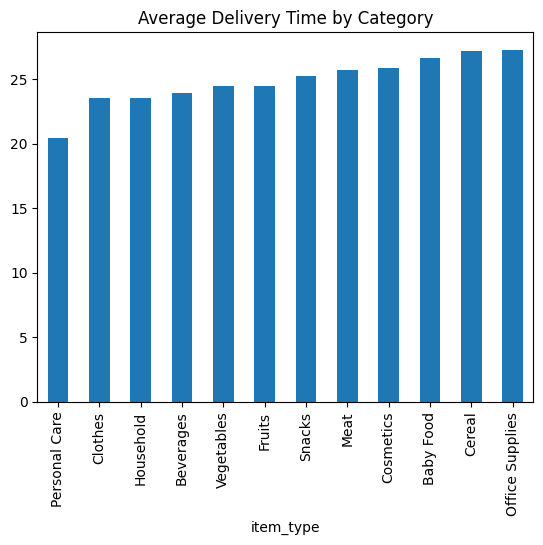

In [44]:
delivery_by_category.plot(kind="bar", title="Average Delivery Time by Category")


In [45]:
delivery_by_country = df.groupby("name")["delivery_days"].mean().sort_values(ascending=False).head(10)
delivery_by_country


,delivery_days
name,
Hungary,32.640000
Georgia,29.695652
Austria,28.500000
Slovakia,28.466667
Luxembourg,27.750000
Lithuania,27.560000
Poland,27.464286
Russia,27.375000
Monaco,26.846154


<Axes: title={'center': 'Top 10 Countries by Avg Delivery Time'}, xlabel='name'>

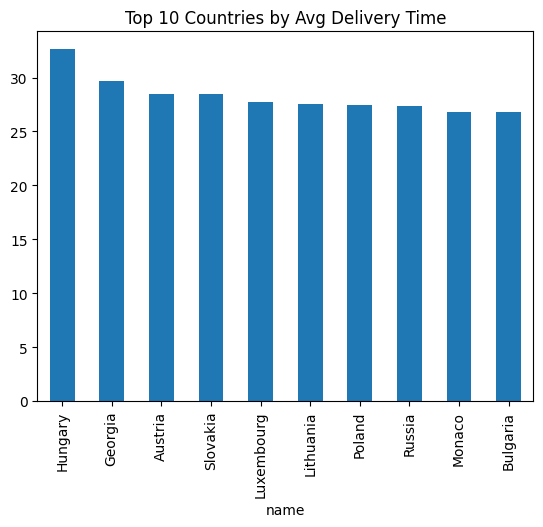

In [46]:
delivery_by_country.plot(kind="bar", title="Top 10 Countries by Avg Delivery Time")


In [47]:
delivery_by_region = df.groupby("region")["delivery_days"].mean().sort_values()
delivery_by_region


,delivery_days
region,
Europe,24.790378
Asia,26.085366


<Axes: title={'center': 'Average Delivery Time by Region'}, xlabel='region'>

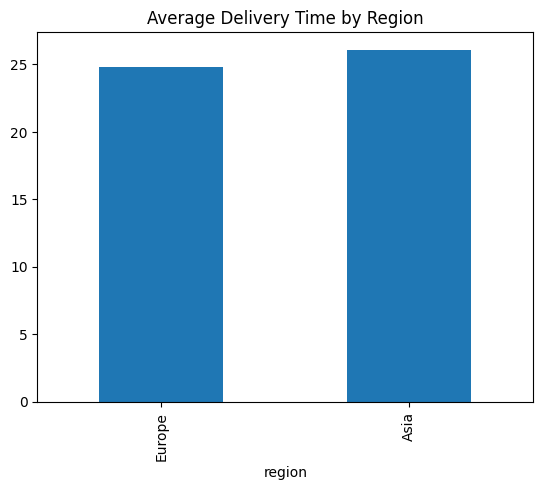

In [48]:
delivery_by_region.plot(kind="bar", title="Average Delivery Time by Region")


In [49]:
df["delivery_group"] = pd.cut(
    df["delivery_days"],
    bins=[0, 5, 10, 15, 30, 100],
    labels=["0-5", "6-10", "11-15", "16-30", "30+"]
)


In [50]:
profit_by_delivery = df.groupby("delivery_group")["profit"].mean()
profit_by_delivery


/tmp/ipython-input-1193033323.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_by_delivery = df.groupby("delivery_group")["profit"].mean()


,profit
delivery_group,
0-5,331361.255349
6-10,368747.547438
11-15,341855.284309
16-30,379317.639497
30+,407421.747440


<Axes: title={'center': 'Average Profit by Delivery Speed'}, xlabel='delivery_group'>

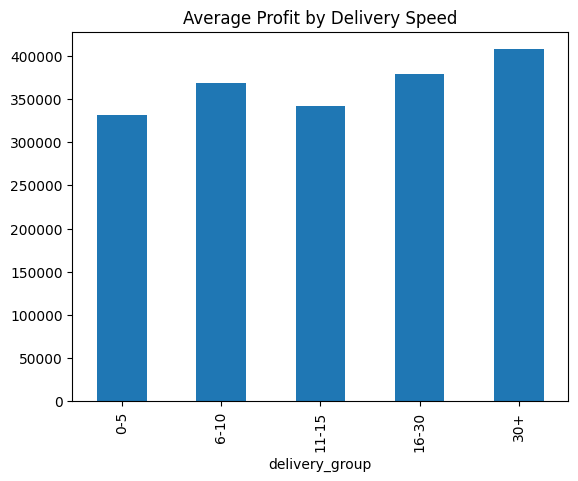

In [51]:
profit_by_delivery.plot(kind="bar", title="Average Profit by Delivery Speed")


In [52]:
df["order_month"] = df["Order Date"].dt.to_period("M").astype(str)


In [53]:
monthly_revenue = df.groupby("order_month")["revenue"].sum()
monthly_revenue


,revenue
order_month,
2010-01,20438106.72
2010-02,19853023.20
2010-03,8474747.19
2010-04,10058016.05
2010-05,19360701.79
...,...
2017-03,18462006.30
2017-04,14397482.38
2017-05,18808310.00


<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='order_month'>

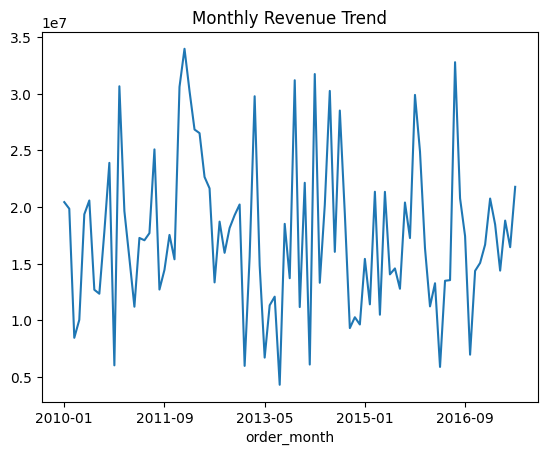

In [54]:
monthly_revenue.plot(kind="line", title="Monthly Revenue Trend")


In [55]:
monthly_category = df.groupby(["order_month", "item_type"])["revenue"].sum().unstack()
monthly_category


item_type,Baby Food,Beverages,Cereal,Clothes,Cosmetics,Fruits,Household,Meat,Office Supplies,Personal Care,Snacks,Vegetables
order_month,,,,,,,,,,,,
2010-01,4149321.12,315352.70,4828601.8,1100012.48,5452321.2,6745.59,NaN,NaN,NaN,1069600.51,2680067.70,836083.62
2010-02,1272060.24,419932.50,952185.3,NaN,NaN,59236.17,516572.71,6734630.07,8224131.09,551023.66,NaN,1123251.46
2010-03,1744328.24,680290.65,1908484.6,929317.12,216851.2,NaN,623495.91,NaN,1814922.27,492668.44,64388.76,NaN
2010-04,NaN,NaN,299910.6,728569.76,NaN,42610.11,NaN,2047010.28,6340180.56,599734.74,NaN,NaN
2010-05,1235555.20,84698.25,1707721.4,672399.84,3474865.6,63453.33,5134986.68,NaN,2850346.17,1415563.60,2721111.72,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03,1213856.40,636541.75,NaN,NaN,NaN,113499.45,NaN,1087210.53,11644286.01,650080.42,2535879.60,580652.14
2017-04,87561.04,1015714.70,NaN,NaN,539504.8,NaN,4955890.32,853061.58,2949330.09,1095263.73,2901156.12,NaN
2017-05,117939.36,31933.85,NaN,404554.56,3250144.8,NaN,400962.00,3942140.16,9220482.39,NaN,NaN,1440152.88


In [56]:
df["order_year"] = pd.to_datetime(df["order_month"]).dt.year


In [57]:
top5_categories = (
    df.groupby("item_type")["revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

df_top5 = df[df["item_type"].isin(top5_categories)]


In [58]:
yearly_top5 = (
    df_top5
    .groupby(["order_year", "item_type"])["revenue"]
    .sum()
    .unstack()
)


<Axes: title={'center': 'Yearly Revenue - Top 5 Categories'}, xlabel='order_year'>

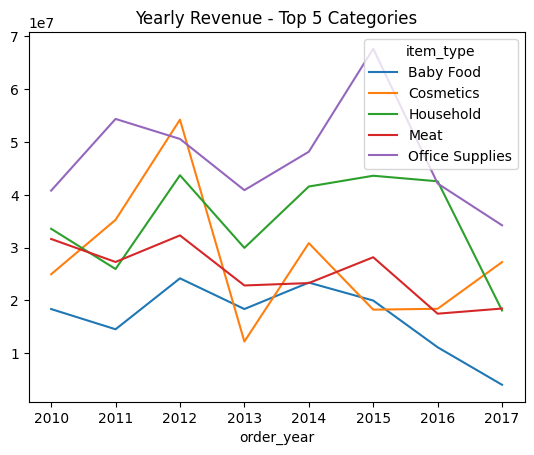

In [59]:
yearly_top5.plot(title="Yearly Revenue - Top 5 Categories")


In [60]:
df["weekday"] = df["Order Date"].dt.day_name()


In [61]:
weekday_revenue = df.groupby("weekday")["revenue"].sum()
weekday_revenue


,revenue
weekday,
Friday,2.436208e+08
Monday,2.591551e+08
Saturday,2.208222e+08
Sunday,2.224033e+08
Thursday,2.032473e+08
Tuesday,2.048675e+08
Wednesday,2.448676e+08


In [62]:
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_revenue = weekday_revenue.reindex(order)


<Axes: title={'center': 'Revenue by Day of Week'}, xlabel='weekday'>

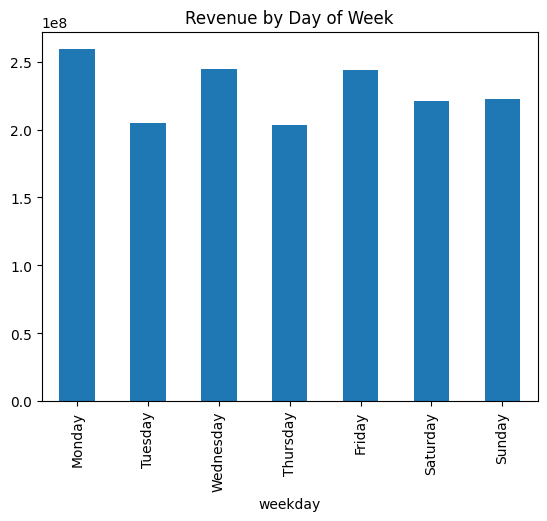

In [63]:
weekday_revenue.plot(kind="bar", title="Revenue by Day of Week")


#Додаткові бізнес-питання, які я дослідив у цьому проєкті:

1. Які категорії товарів мають великий дохід, але низький прибуток?
2. Чи впливає швидкість доставки на обсяги продажів?

1. Які категорії товарів мають великий дохід, але низький прибуток?


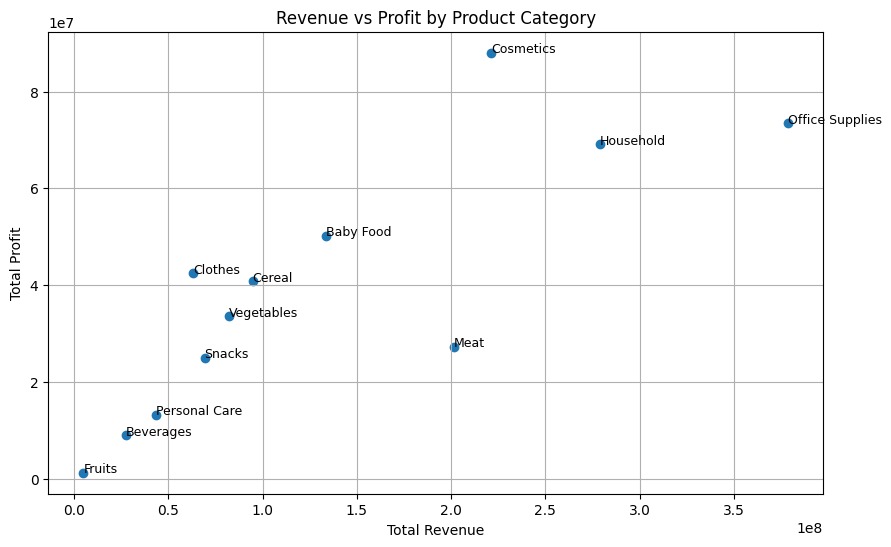

In [64]:

# Групуємо по категоріях
category_revenue_profit = df.groupby("item_type")[["revenue", "profit"]].sum()

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    category_revenue_profit["revenue"],
    category_revenue_profit["profit"]
)

# Підписуємо точки
for cat in category_revenue_profit.index:
    x = category_revenue_profit.loc[cat, "revenue"]
    y = category_revenue_profit.loc[cat, "profit"]
    plt.text(x, y, cat, fontsize=9)

plt.title("Revenue vs Profit by Product Category")
plt.xlabel("Total Revenue")
plt.ylabel("Total Profit")
plt.grid(True)
plt.show()


Графік показує, що деякі категорії мають високий дохід, але відносно невеликий прибуток. Це може свідчити про низьку маржу або високі витрати в цих категоріях. Для бізнесу це сигнал, що саме в цих категоріях варто переглянути цінову політику або оптимізувати витрати.

2. Чи впливає швидкість доставки на обсяги продажів?

/tmp/ipython-input-535888434.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  units_by_delivery = df.groupby("delivery_group")["Units Sold"].mean()


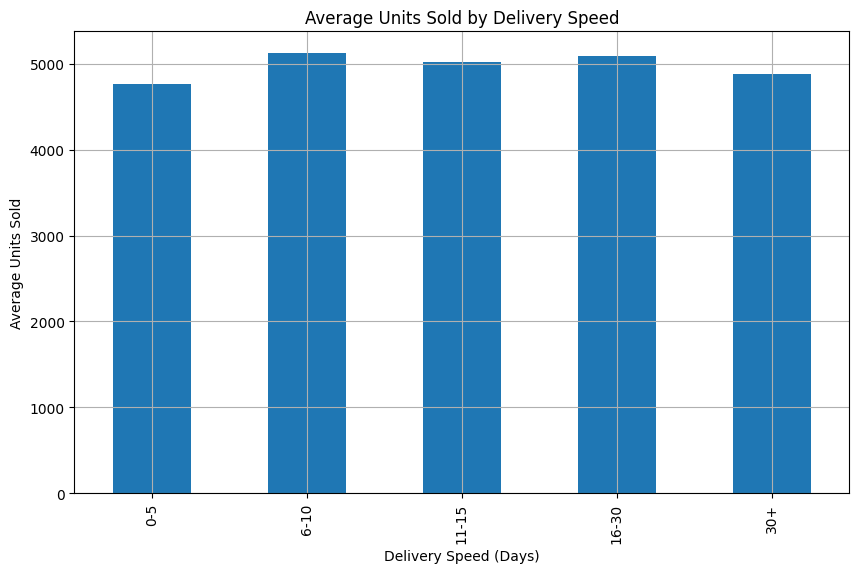

In [66]:
# Середня кількість проданих одиниць за групами доставки
units_by_delivery = df.groupby("delivery_group")["Units Sold"].mean()

# Bar chart
plt.figure(figsize=(10, 6))
units_by_delivery.plot(kind="bar")

plt.title("Average Units Sold by Delivery Speed")
plt.xlabel("Delivery Speed (Days)")
plt.ylabel("Average Units Sold")
plt.grid(True)
plt.show()


З графіка видно, що швидші терміни доставки в середньому повʼязані з більшою кількістю проданих одиниць товару. Це може свідчити про те, що клієнти надають перевагу швидкій доставці, і для бізнесу це є важливим фактором конкурентоспроможності.

#Sales Data Analysis (Python, Pandas, Data Visualization)

* In this project, I performed a full sales data analysis based on three
datasets: sales, products, and countries. The work included data cleaning, handling missing values, checking anomalies, and merging tables into a single analytical dataset.

* I calculated revenue, cost, and profit, analyzed performance by product categories, countries, regions, and sales channels. Additionally, I explored delivery time, its impact on profit, monthly revenue trends, top revenue categories by year, and revenue distribution by weekdays.

* This project demonstrates my skills in Python, Pandas, merging relational data, feature engineering, exploratory data analysis, and business insights generation.

#Аналіз продажів компанії (Python, Pandas, Data Visualization)

* У цьому проєкті було проведено повний цикл аналізу продажів компанії на основі трьох датасетів: продажів, продуктів та країн. Було виконано очищення даних, обробку пропусків, перевірку аномалій та обʼєднання таблиць в єдиний датафрейм.

* Під час аналізу я розрахував дохід, витрати та прибуток, проаналізував показники за товарними категоріями, країнами, регіонами та каналами продажів. Додатково було досліджено швидкість доставки та її вплив на прибуток, сезонність продажів, динаміку доходу по місяцях та дні тижня.

* Проєкт демонструє мої навички роботи з Python, Pandas, обʼєднання таблиць (merge), feature engineering, exploratory data analysis та бізнес-інтерпретації результатів.